## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1181]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [1182]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
# Importing Bitstamp.csv and establishing index column as "Timestamp"
bitstamp_csv_path = Path("Resources/bitstamp.csv")

bitstamp_df = pd.read_csv(
    bitstamp_csv_path, 
    index_col="Timestamp", 
    infer_datetime_format=True, 
    parse_dates=True
  
    
)



### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [1183]:
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [1184]:
# Use the head (and/or tail) function to confirm that the data was imported properly.

bitstamp_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [1185]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
# Importing coinbase.csv and establishing indec column as "Timestamp"
coinbase_csv_path = Path("Resources/coinbase.csv")

coinbase_df = pd.read_csv(
    coinbase_csv_path, 
    index_col="Timestamp", 
    infer_datetime_format=True, 
    parse_dates=True
)




In [1186]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [1187]:
coinbase_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [1188]:
before = len(bitstamp_df.index)

# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp_df = bitstamp_df.dropna()
# find out how to verify the n/a
after = len(bitstamp_df.index)
print(before)
print(after)

129540
129067


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [1189]:
# Use the str.replace function to remove the dollar sign, $

bitstamp_df.loc[:,'Close'] = bitstamp_df.loc[:,'Close'].str.replace("$","")



/Users/juliannamilin/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


### Step 3: Convert the data type of the Close column to a `float`.

In [1190]:
# Convert the Close data type to a float


bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")
bitstamp_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [1191]:
# Review the data for duplicate values, and drop them if necessary


bitstamp_df = bitstamp_df.drop_duplicates()
# find out how to verify the n/a


bitstamp_df.duplicated().sum()
# No duplicates

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [1192]:
# Repeat Steps 1–4 for the coinbase DataFrame
before = len(coinbase_df.index)

# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

coinbase_df = coinbase_df.dropna()
# find out how to verify the n/a
after = len(coinbase_df.index)
print(before)
print(after)

129540
129322


In [1193]:
# Replacing $ with no value, removing $ in order to analyze the numbers

coinbase_df.loc[:,'Close'] = coinbase_df.loc[:,'Close'].str.replace("$","")


/Users/juliannamilin/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1194]:
# Verifying all values are converted to floats

coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")
coinbase_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [1195]:
# Review the data for duplicate values, and drop them if necessary



coinbase_df = coinbase_df.drop_duplicates()
# find out how to verify the n/a

coinbase_df.duplicated().sum()


# no duplicates

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [1196]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
# Are we using date or timestamp as the index?????
# working with iloc

# Isolating the "Close" columns for bitstamp_sliced variable
# working with loc
bitstamp_sliced = bitstamp_df.loc[:, ["Close"]]

# iloc is for number using "interger Location" key would be intergers
# loc is for location key will be generally a string but could also be a column in an odd circumstace

# Review the first five rows of the DataFrame
bitstamp_sliced.head()


,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [1197]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
# Isolating the "Close columns for bitstamp_sliced variable"
coinbase_sliced = coinbase_df.loc[:, ["Close"]]

# iloc is for number using "interger Location" key would be intergers
# loc is for location key will be generally a string but could also be a column in an odd circumstace

# Review the first five rows of the DataFrame
coinbase_sliced.head()



,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [1198]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [1199]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Closing Data Bitcoin, Bitstamp Exchange'}, xlabel='Timestamp'>

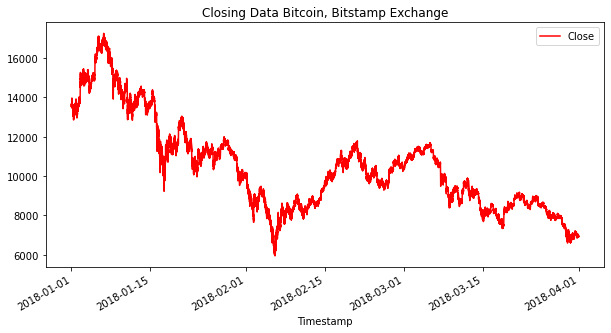

In [1200]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

bitstamp_sliced.plot(figsize=(10, 5), title="Closing Data Bitcoin, Bitstamp Exchange", color="red")




<AxesSubplot:title={'center':'Closing Data Bitcoin, Coinbase Exchange'}, xlabel='Timestamp'>

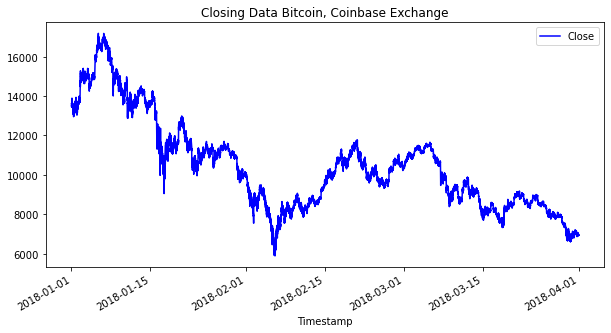

In [1201]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

coinbase_sliced.plot(figsize=(10, 5), title="Closing Data Bitcoin, Coinbase Exchange", color="blue")



<AxesSubplot:title={'center':'Bitstamps and Coinbase Overlay'}, xlabel='Timestamp'>

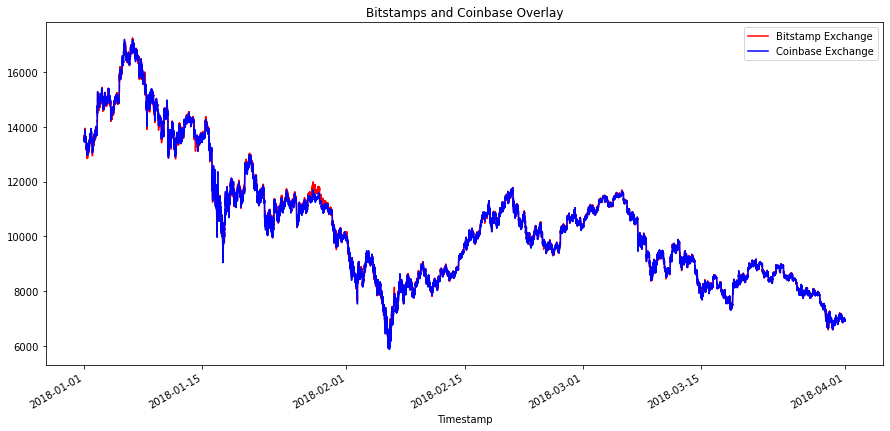

In [1202]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 7), title="Bitstamps and Coinbase Overlay", color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 7), color="blue", label="Coinbase Exchange")



<AxesSubplot:title={'center':'Bitstamps and Coinbase Overlay January 2018'}, xlabel='Timestamp'>

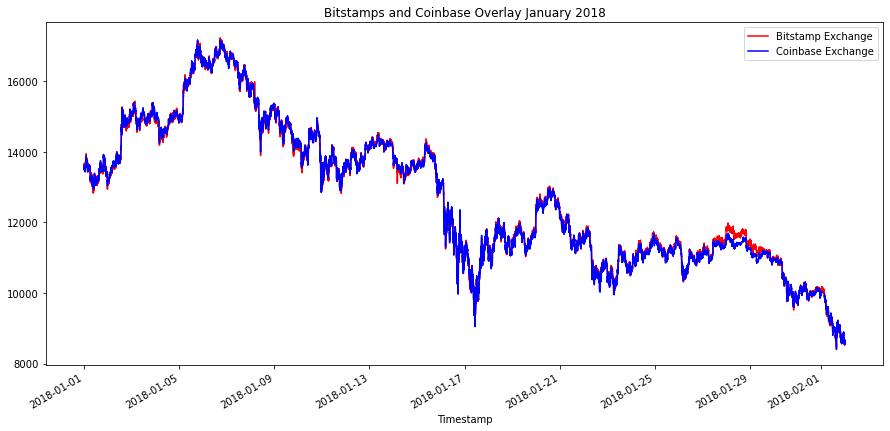

In [1203]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# Searching for arbitrage opportunity in January


bitstamp_sliced['Close'].loc['2018-01-01':'2018-02-01'].plot(
    legend=True, figsize=(15, 7), title="Bitstamps and Coinbase Overlay January 2018", color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc['2018-01-01':'2018-02-01'].plot(
    legend=True, figsize=(15, 7), color="blue", label="Coinbase Exchange")




<AxesSubplot:title={'center':'Bitstamps and Coinbase Overlay February 2018'}, xlabel='Timestamp'>

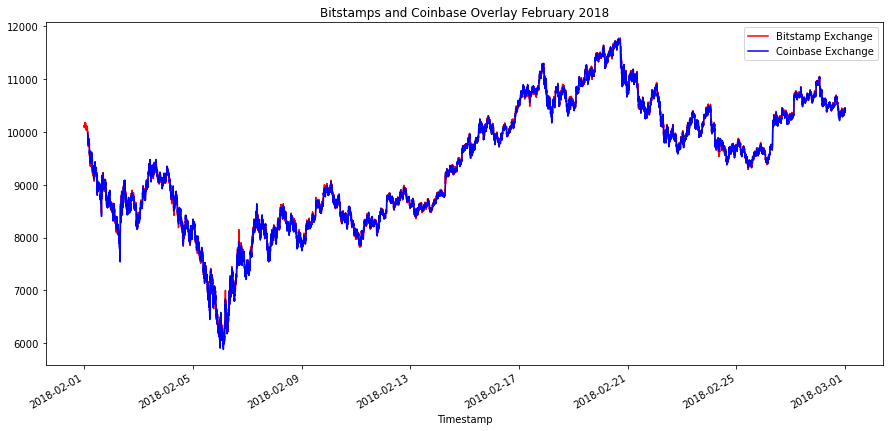

In [1204]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period middle in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# Searching for arbitrage opportunity in February

bitstamp_sliced['Close'].loc['2018-02-01':'2018-02-28'].plot(
    legend=True, figsize=(15, 7), title="Bitstamps and Coinbase Overlay February 2018", color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc['2018-02-01':'2018-02-28'].plot(
    legend=True, figsize=(15, 7), color="blue", label="Coinbase Exchange")

<AxesSubplot:title={'center':'Bitstamps and Coinbase Overlay March 2018'}, xlabel='Timestamp'>

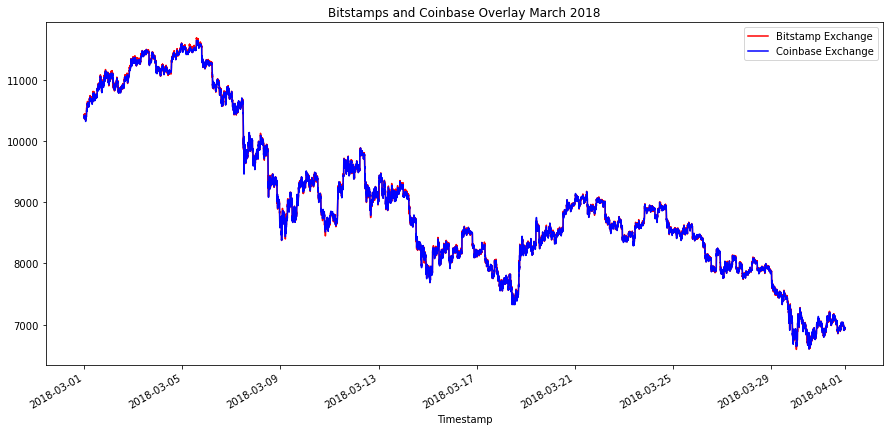

In [1205]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# Searching for arbitrage opportunity in March

bitstamp_sliced['Close'].loc['2018-03-01':'2018-04-01'].plot(
    legend=True, figsize=(15, 7), title="Bitstamps and Coinbase Overlay March 2018", color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc['2018-03-01':'2018-04-01'].plot(
    legend=True, figsize=(15, 7), color="blue", label="Coinbase Exchange")



**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes the degrees of spread lessens over time after January 30th 2018.  The opportunity lies when Bitstamp is trading at a higher price than coinbase.  We can caluculate the number of times the market closes on the minute to maximize profits over this one day period.

Yes, the degree of the spread change was most obvious in January of 2018.  There is certainly an arbitrage opportunity in late January 2018

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamps and Coinbase Overlay January 28 2018'}, xlabel='Timestamp'>

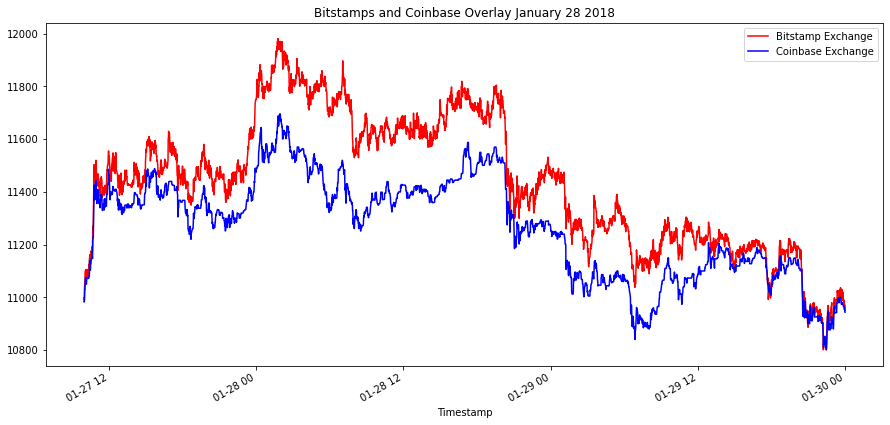

In [1206]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# # Searching for arbitrage opportunity in January 28

bitstamp_sliced['Close'].loc['2018-01-27 10':'2018-01-29'].plot(
    legend=True, figsize=(15, 7), title="Bitstamps and Coinbase Overlay January 28 2018", color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc['2018-01-27 10':'2018-01-29'].plot(
    legend=True, figsize=(15, 7), color="blue", label="Coinbase Exchange")



In [1207]:
# Using the early date that you have selected, calculate the arbitrage spread 
# Finding out how many arbitrage opportunities there were for January 27
#   
bitstamp_spread_1 = bitstamp_sliced['Close'].loc['2018-01-27 10':'2018-01-29']
coinbase_spread_1 = coinbase_sliced['Close'].loc['2018-01-27 10':'2018-01-29']
arbitrage_spread_1 = bitstamp_spread_1 - coinbase_spread_1


arbitrage_spread_1.describe()

count    3694.000000
mean      167.964164
std        95.704680
min       -48.010000
25%        84.992500
50%       174.135000
75%       240.000000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Analysis January 28 2018'}>

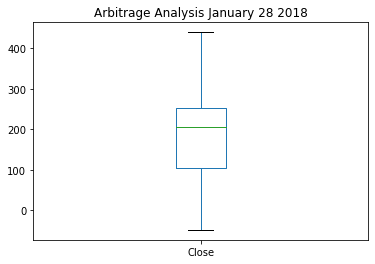

In [1208]:
 # Visualize the arbitrage spread from early in the dataset in a box plot  

arbitrage_spread_1 = bitstamp_sliced["Close"].loc ["2018-1-28":"2018-1-29"] - coinbase_sliced["Close"].loc ["2018-1-28":"2018-1-29"]


arbitrage_spread_1.plot(kind = "box", title = "Arbitrage Analysis January 28 2018")



<AxesSubplot:title={'center':'Bitstamps and Coinbase Overlay February 27 2018'}, xlabel='Timestamp'>

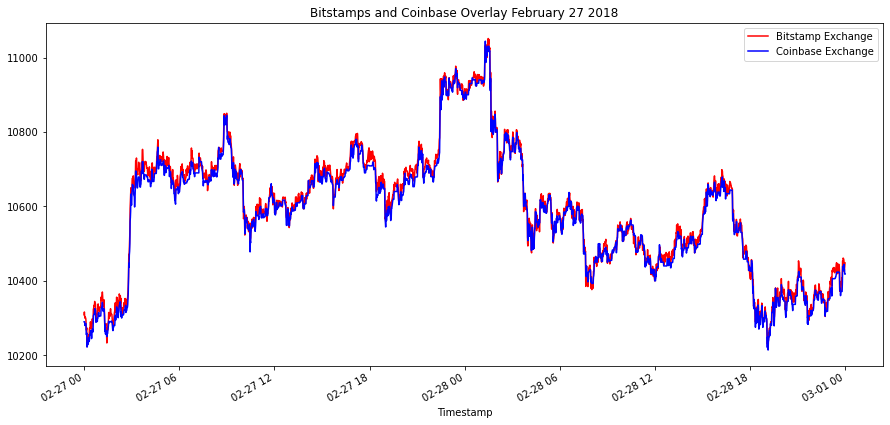

In [1209]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# Analying artitrage opportunity for Feruary 28

bitstamp_sliced['Close'].loc['2018-02-27':'2018-02-28'].plot(
    legend=True, figsize=(15, 7), title="Bitstamps and Coinbase Overlay February 27 2018", color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc['2018-02-27':'2018-02-28'].plot(
    legend=True, figsize=(15, 7), color="blue", label="Coinbase Exchange")



In [1210]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# Finding how many opportunities there were for arbitrage on Feb 28

bitstamp_spread_2 = bitstamp_sliced['Close'].loc['2018-02-27':'2018-02-28']
coinbase_spread_2 = coinbase_sliced['Close'].loc['2018-02-27':'2018-02-28']
arbitrage_spread_2 = bitstamp_spread_2 - coinbase_spread_2
arbitrage_spread_2.describe()




count    2865.000000
mean       11.013250
std        11.494751
min       -35.030000
25%         3.850000
50%        11.050000
75%        18.790000
max        51.550000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Analysis February 27 2018'}>

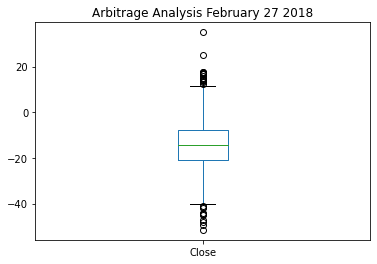

In [1211]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot TA HELP!!!
# Remember to change the data in here

arbitrage_spread_2 = coinbase_sliced["Close"].loc ["2018-2-27"] - bitstamp_sliced["Close"].loc ["2018-2-27"]

arbitrage_spread_2.plot(kind = "box", title = "Arbitrage Analysis February 27 2018")



<AxesSubplot:title={'center':'Bitstamps and Coinbase Overlay March 292018'}, xlabel='Timestamp'>

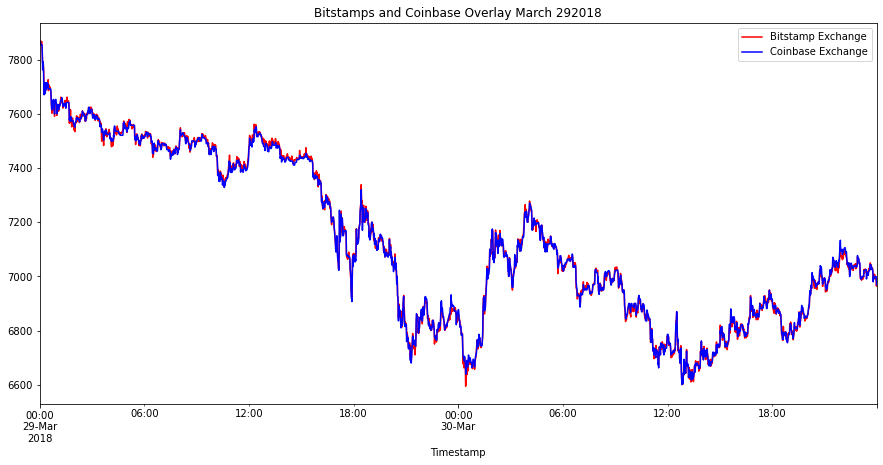

In [1212]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# Analying arbitrage opportunities for March 30

bitstamp_sliced['Close'].loc['2018-03-29':'2018-03-30'].plot(
    legend=True, figsize=(15, 7), title="Bitstamps and Coinbase Overlay March 292018", color="red", label="Bitstamp Exchange")
coinbase_sliced['Close'].loc['2018-03-29':'2018-03-30'].plot(
    legend=True, figsize=(15, 7), color="blue", label="Coinbase Exchange")



In [1213]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# Calculating number of trade opportunities for March 30

bitstamp_spread_3 = bitstamp_sliced['Close'].loc['2018-03-29':'2018-03-30']
coinbase_spread_3 = coinbase_sliced['Close'].loc['2018-03-29':'2018-03-30']
arbitrage_spread_3 = bitstamp_spread_3 - coinbase_spread_3
arbitrage_spread_3.describe()



count    2880.000000
mean        0.684052
std         9.719394
min       -89.900000
25%        -5.160000
50%         1.095000
75%         6.962500
max        45.600000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Analysis 1'}>

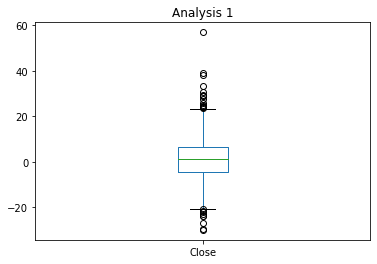

In [1214]:
# Visualize the arbitrage spread from late in the dataset in a box plot  

arbitrage_spread_3 = coinbase_sliced["Close"].loc ["2018-03-30"] - bitstamp_sliced["Close"].loc ["2018-03-30"]

arbitrage_spread_3.plot(kind = "box", title = "Analysis 1")



### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [1215]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
# Calculating the spread of money to be made if trading between bitstamp and coinbase on January 27 on every minute close

measure_arbitrage_1 = bitstamp_spread_1 - coinbase_spread_1
measure_arbitrage_1 = measure_arbitrage_1[measure_arbitrage_1>0]


# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
measure_arbitrage_1.describe()


count    3643.000000
mean      170.435180
std        94.043478
min         0.570000
25%        89.905000
50%       175.840000
75%       240.985000
max       439.010000
Name: Close, dtype: float64

In [1216]:
# Calculating the spread of money to be made if trading between bitstamp and coinbase on February 28 on every minute close

measure_arbitrage_2 = bitstamp_spread_2 - coinbase_spread_2
measure_arbitrage_2 = measure_arbitrage_2[measure_arbitrage_2>0]


# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
measure_arbitrage_2.describe()





count    2404.000000
mean       14.425616
std         8.849808
min         0.010000
25%         7.670000
50%        13.415000
75%        20.000000
max        51.550000
Name: Close, dtype: float64

In [1217]:
# Calculating the spread of money to be made if trading between bitstamp and coinbase on March 30 on every minute close

measure_arbitrage_3 = bitstamp_spread_3 - coinbase_spread_3
measure_arbitrage_3 = measure_arbitrage_3[measure_arbitrage_3>0]


# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
measure_arbitrage_3.describe()

count    1570.000000
mean        7.492000
std         5.687539
min         0.010000
25%         3.145000
50%         6.390000
75%        10.327500
max        45.600000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [1218]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
# For January 29 there are 1379 times we can make a profitable trade at 1.1% before fees

spread_return_early = arbitrage_spread_1[arbitrage_spread_1 > 0] / coinbase_sliced["Close"].loc["2018-01-29"]

# Review the spread return DataFrame
spread_return_early.describe()


count    1379.000000
mean        0.011298
std         0.007512
min         0.000052
25%         0.003790
50%         0.013063
75%         0.018445
max         0.027075
Name: Close, dtype: float64

In [1219]:
# For February 28 there are 109 times we can make a profitable trade before fees

spread_return_middle = arbitrage_spread_2[arbitrage_spread_2 > 0] / coinbase_sliced["Close"].loc["2018-02-27"]

# Review the spread return DataFrame
spread_return_middle.describe()

count    109.000000
mean       0.000629
std        0.000555
min        0.000008
25%        0.000231
50%        0.000448
75%        0.000858
max        0.003200
Name: Close, dtype: float64

In [1220]:
# For March 30 there are 1379 times we can make a profitable trade before fees

spread_return_late = arbitrage_spread_3[arbitrage_spread_3 > 0] / coinbase_sliced["Close"].loc["2018-03-30"]

# Review the spread return DataFrame
spread_return_late.describe()

count    797.000000
mean       0.001093
std        0.000911
min        0.000001
25%        0.000403
50%        0.000876
75%        0.001543
max        0.008558
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [1221]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
Name: Close, dtype: float64

In [1222]:
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [1223]:
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [1224]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

profitable_trades_early.describe()

count    742.000000
mean       0.017795
std        0.003142
min        0.010021
25%        0.015371
50%        0.018233
75%        0.020063
max        0.027075
Name: Close, dtype: float64

In [1225]:
# Calculating profitable trades for Feb 27 dropping n/a values

profitable_trades_middle.describe().dropna()

count    0.0
Name: Close, dtype: float64

In [1226]:
# Calculating profitable trades for Macrh 30 dropping n/a values

profitable_trades_late.describe().dropna()

count    0.0
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [1227]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profitable_trades_early * coinbase_sliced["Close"].loc["2018-01-29"]
# View the early profit DataFrame
profit_per_trade_early.to_frame().head()
# Total revenue associated with trades, but to be true profit we need to subtract 1% from these values

,Close
Timestamp,
2018-01-29 00:00:00,201.98
2018-01-29 00:01:00,217.00
2018-01-29 00:02:00,217.22
2018-01-29 00:03:00,223.22
2018-01-29 00:04:00,208.64


In [1228]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profitable_trades_middle * coinbase_sliced["Close"].loc["2018-02-27"].dropna()
# View the early profit DataFrame
profit_per_trade_middle.to_frame().head().dropna()
# Total revenue associated with trades, but to be true profit we need to subtract 1% from these values

,Close
Timestamp,


In [1229]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profitable_trades_late * coinbase_sliced["Close"].loc["2018-03-30"].dropna()
# View the early profit DataFrame
profit_per_trade_late.to_frame().head().dropna()
# Total revenue associated with trades, but to be true profit we need to subtract 1% from these values

,Close
Timestamp,


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [1230]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.to_frame().describe()

,Close
count,742.000000
mean,196.724070
std,34.604234
min,111.200000
25%,170.037500
50%,200.930000
75%,221.002500
max,300.270000


<AxesSubplot:title={'center':'Profits for January 29 2018'}, xlabel='Timestamp'>

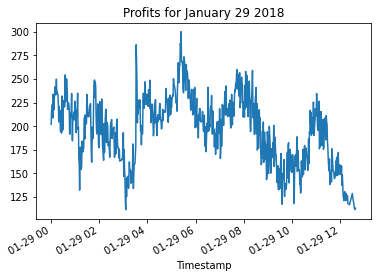

In [1231]:
# Plot the results for the early profit per trade DataFrame
# after 12pm profits were less that 1% which would not pay for the trading fee
profit_per_trade_early = profit_per_trade_early.dropna()
profit_per_trade_early.plot(title="Profits for January 29 2018")

In [1232]:
# No profitable trades on Feb 27

profit_per_trade_middle.to_frame().describe().dropna()

,Close
count,0.0


<AxesSubplot:title={'center':'Profits for February 27 2018'}, xlabel='Timestamp'>

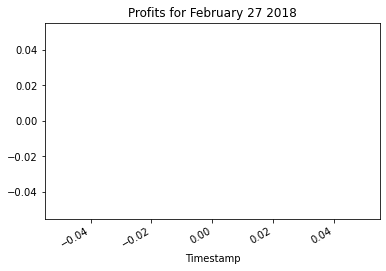

In [1233]:
profit_per_trade_middle = profit_per_trade_middle.dropna()
profit_per_trade_middle.plot(title="Profits for February 27 2018")

In [1234]:
# No profitable trades on March 30

profit_per_trade_late.to_frame().describe().dropna()

,Close
count,0.0


<AxesSubplot:title={'center':'Profits for March 30 2018'}, xlabel='Timestamp'>

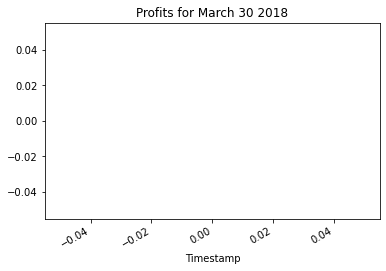

In [1235]:
profit_per_trade_late = profit_per_trade_late.dropna()
profit_per_trade_late.plot(title="Profits for March 30 2018")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [1236]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# Total profits earned on Jan 29
print(profit_per_trade_early.sum())

145969.25999999995


In [1237]:
# Total profits earned on Feb 28

print(profit_per_trade_middle.sum())

0.0


In [1238]:
# Total profits earned on March 30

print(profit_per_trade_late.sum())

0.0


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [1239]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumultive Profits for January 29 2018'}, xlabel='Timestamp'>

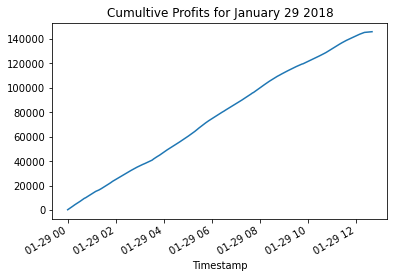

In [1240]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title="Cumultive Profits for January 29 2018")

In [1241]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumultive Profits for February 27 2018'}, xlabel='Timestamp'>

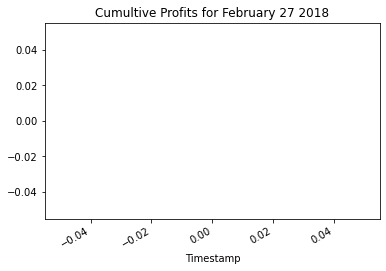

In [1242]:
cumulative_profit_middle.plot(title="Cumultive Profits for February 27 2018")

In [1243]:
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumultive Profits for March 30 2018'}, xlabel='Timestamp'>

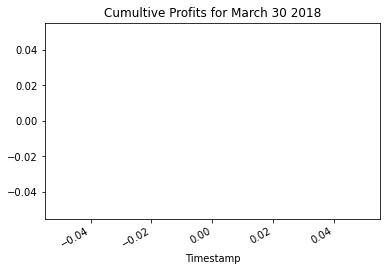

In [1244]:
cumulative_profit_late.plot(title="Cumultive Profits for March 30 2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE

We are calucating revenue not profits.  The assigment is confusing because there is not any instructions on how to calculate profits.  According to the charts the only day in the entire spead is January 30th 2018.  We can trade 742 times at an avergae profit of 1.7795% with a total profit of $145969.26 from trading one BTC back and forth during this time period.